# ADS Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Problem Description

-- Input some description here --

## 1) Loading & Cleaning the Data

In [2]:
#load Data Functions
def read_data_from_csv(pathInput, columnName, df_list):
    dfColumn = pd.read_csv(pathInputDir + pathInput, delimiter=',', dtype='str', header=0)
    df_list[columnName] = dfColumn
    return df_list

In [3]:
#list of input columns
columns = [
    "MarketCap",
    "AddressCount", 
    "TxGrowth",
    "Difficulty",
    "NetworkHash",
    "NetworkUtilization",
    "TransactionFee",
    "AvgGasPrice",
    "BlockCountReward",
    "BlockSize",
    "BlockTime",
    "Ethersupply",
    "GasLimit",
    "GasUsed",
    "Uncles",
    "BtcPrice"
]

pathInputDir = "../Data Source"

# list of directories of Data
pathDir = [
    "/Currency Information/export-MarketCap.csv",
    "/General Information/export-AddressCount.csv",
    "/General Information/export-TxGrowth.csv",
    "/Network Information/export-BlockDifficulty.csv",
    "/Network Information/export-NetworkHash.csv",
    "/Network Information/export-NetworkUtilization.csv",
    "/Network Information/export-TransactionFee.csv",
    "/Blockchain Information/export-AvgGasPrice.csv",
    "/Blockchain Information/export-BlockCountRewards.csv",
    "/Blockchain Information/export-BlockSize.csv",
    "/Blockchain Information/export-BlockTime.csv",
    "/Blockchain Information/export-Ethersupply.csv",
    "/Blockchain Information/export-GasLimit.csv",
    "/Blockchain Information/export-GasUsed.csv",
    "/Blockchain Information/export-Uncles.csv",
    "/bitcoin/market-price-bitcoin.csv"
]

df_list = {}
for i in range(len(columns)):
    df_list = read_data_from_csv(pathDir[i], columns[i], df_list)
    

In [4]:
# Merging all df from df list


df_list["MarketCap"] = df_list["MarketCap"].drop(columns="MarketCap")

#copy market cap
df_data = df_list["MarketCap"].copy()
#drop timestamp since it's not needed
df_data.drop(columns ="UnixTimeStamp", inplace =True) 

#without marketCap and BtcPrice
for i in range(1,len(columns)-1):
    df_data[columns[i]] = df_list[columns[i]].Value.values
    
# Merging same date from the dfBTCPrice
df_data["BtcPrice"] = df_list["BtcPrice"][1:].sort_index(ascending=False).Price.values

In [5]:
# Move target variables to the end of columns
target_var = df_data["Price"]
df_data = df_data.drop(columns="Price")
df_data["Price"] = target_var

In [6]:
# Converting from str
df_data.replace(',','', inplace=True,regex=True)

df_data1 = df_data.loc[:, df_data.columns != 'Date(UTC)'].astype('float')
df_data['Date(UTC)'] = df_data['Date(UTC)'].astype('datetime64')
df_data.loc[:, df_data.columns != 'Date(UTC)'] = df_data1

df_data.rename(columns={"Date(UTC)": "Date"}, inplace = True)

df_data.head()

,Date,Supply,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
0,2015-07-30,7.204931e+07,9205.0,8893.0,0.121,11.5297,0.0,0.0,0.0,6912.0,644.0,4.46,39316.09375,0.0,0.0,1299.0,287.0,0.0
1,2015-07-31,7.208550e+07,9361.0,0.0,0.603,51.4594,0.0,0.0,0.0,6863.0,582.0,12.58,36191.71875,0.0,0.0,511.0,283.7,0.0
2,2015-08-01,7.211320e+07,9476.0,0.0,0.887,57.7845,0.0,0.0,0.0,5293.0,575.0,16.34,27705.93750,0.0,0.0,334.0,280.5,0.0
3,2015-08-02,7.214143e+07,9563.0,0.0,1.020,67.9224,0.0,0.0,0.0,5358.0,581.0,16.12,28223.43750,0.0,0.0,394.0,281.4,0.0
4,2015-08-03,7.216940e+07,9639.0,0.0,1.126,74.5737,0.0,0.0,0.0,5280.0,587.0,16.37,27976.71875,0.0,0.0,443.0,281.6,0.0


## 2) Exploratory Data Analysis

In [ ]:
df_data.info()

In [ ]:
df_data.describe()

In [ ]:
# Correlations
df_corr = df_data.corr()
df_corr

### Data Visualization

In [ ]:
# Visualizations - HeatMap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,linecolor='white',linewidth='1',cmap='coolwarm',annot=True)

In [ ]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

a = chunkIt(df_data.columns.values, 4)

In [ ]:
for column in a:
    sns.pairplot(data=df_data,
                      y_vars=['Price'],
                      x_vars= column)
    plt.show()

In [ ]:
# Visualizations - PairPlot
sns.pairplot(df_data)
plt.show()

In [ ]:
# Visualizations
x = df_data["Date"]

for element in columns[1:]:
    plt.show()
    y = df_data[element]
    fig = plt.figure(figsize = (15,5), dpi=100)
    axes = fig.add_axes([0.5,0.5,0.5,0.5])
    axes.plot(x,y)
    axes.set_title(element+" with date")

plt.show()

In [ ]:
# Time Series Analysis
df_time = df_data.set_index('Date').copy()

df_time['Year'] = df_time.index.year
df_time['Month'] = df_time.index.month
df_time['Weekday Name'] = df_time.index.weekday_name


df_time.head()

sns.set_style("dark")
sns.set(rc={'figure.figsize':(15, 7)})

for element in columns[1:]:
    plt.show()
    df_time[element].plot(linewidth=1,title = element+" over time (Day)");

In [ ]:
# columns
axes = df_time["2018"][columns[1:]].plot(alpha=0.5,  figsize=(20, 50), subplots=True)
for ax in axes:
    ax.set_ylabel('Over time (Day)')

In [ ]:
fig, axes = plt.subplots(19, 1, figsize=(20, 40), sharex=True)
for name, ax in zip(columns[1:], axes):
    sns.boxplot(data=df_time, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

### Seasonality Plot

In [ ]:
#monthly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Month', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title(name)

In [ ]:
#Weekly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Weekday Name', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title(name)

In [ ]:
#monthly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Year', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title(name)

In [ ]:
df_time.info()

In [ ]:

years = ['2015','2016','2017','2018','2019']
test = {}
for year in years:
    test[year] = df_time[year][["Month","Price"]].rolling(90, center=True).mean()
    
fig, ax = plt.subplots()
for a in test:
    ax.plot(test[a]["Month"],test[a]["Price"], linewidth=2, label= a)
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Price in $')
ax.set_title('Trends in Ethereum Price');

### Trend Plot

In [ ]:
import matplotlib.dates as mdates

column='Price'
data_columns = ['Price','BtcPrice']
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
df_time_365d = df_time[data_columns].rolling(window=365, center=True, min_periods=360).mean()
df_time_7d = df_time[data_columns].rolling(7, center=True).mean()

# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(df_time[column], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(df_time_7d[column], linewidth=2, label='7-d Rolling Mean')
ax.plot(df_time_365d[column], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Price in $')
ax.set_title('Trends in Ethereum Price');
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [ ]:
ax.get_xticklabels()

In [ ]:
# Visualizations - BoxPlot
columns = df_data.columns
sns.set(style="whitegrid")

for element in columns[1:]:   
    plt.figure(figsize = (15,3))
    ax = sns.boxplot(x=df_data[element])

## 3) Feature Engineering
### Handling outliers


### Normalization

### Feature Selection

### Feature Importance plots

## 4) Model Fitting
### Grid search (Hyperparameter Tuning)

### Data Split train and test

In [ ]:
print(len(df_data[:-365]["Price"]))
print(len(df_data[-365:]["Price"]))

In [ ]:
# Some simple forecasting methods
# Avarage Method
average_method = df_data[:-365]["Price"].mean()
print("Average: "+str(average_method))

# Naive Method
naive_method = df_data.iloc[-366]["Price"]
print("Naive: "+str(naive_method))

# Drift Method
df = df_data[:-365][["Date","Price"]].copy()
df['Price t-1'] = df['Price'].shift(1) # creating t-1

yt = naive_method
yt_minus_one = df[1:]['Price t-1']
y = df[1:]['Price']

drift = []
horizon = 30
for h in range(horizon):
    drift.append(yt+h*(((y-yt_minus_one).sum())/(len(df[1:])-1)))

### Fit the model and predict

In [7]:
# Multivariable LSTM
# convert series to supervised learning
from sklearn import preprocessing

def normalise_var(x):
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    x_scaled = min_max_scaler.fit_transform(x)
    normalised_features = pd.DataFrame(columns=x.columns.values, data=x_scaled)
    return normalised_features, min_max_scaler

def denormalise_var(x, scaler): 
    x_scaled = scaler.inverse_transform(x)
    normalised_features = pd.DataFrame(columns=x.columns.values, data=x_scaled)
    return normalised_features


### LSTM
from sklearn.preprocessing import MinMaxScaler

def shift_var(data, prev, future, endog, exog):
    lag_var = pd.DataFrame()
    for i in range(prev+future,-1,-1):
        if i>future:
            time = "t-"+str(i-future)
            lag_var[time] = data[endog].shift(i).values
            for c in exog:
                lag_var[time + "_"+c] = data[c].shift(i).values
        
        elif i == future:
            time = "t"
            lag_var[time] = data[endog].shift(i).values
        else:
            time = "t+"+str(future-i)
            lag_var[time] = data[endog].shift(i).values
    lag_var[time] = data[endog].values
    lag_var = lag_var[prev+future:]
    return lag_var


In [8]:
def lstm(data, sequence = 60,pred_time = 3,horizon = 30,features = [],layer = 50,epo = 50,batch=67,optimizer_lstm ="adam",loss_lstm = 'mean_squared_error' ):
    
    dataset_train = shift_var(data[:-(horizon+sequence+pred_time)],sequence, pred_time,"Price",features)
    dataset_test = shift_var(data[-(horizon+sequence+pred_time):],sequence, pred_time,"Price",features)
    
    # Creating Training Set
    training_set,sc = normalise_var(dataset_train)
    
    X_train = training_set.iloc[:, :-(pred_time+1)]
    y_train = training_set.iloc[:, -1] # for multiple we could use -(pred_time+1)
    
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
    
    
    #Creating Test Set
    
    X_test = dataset_test.iloc[:, :-(pred_time+1)]
    X_test,scx = normalise_var(X_test)
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

    #Creating y_test to for the normaliser to decompose is later
    y_test = dataset_test.iloc[:, -1:]
    y_test,scy = normalise_var(y_test)    
    y_test = np.array(y_test[y_test.columns.values[0]].values)
    
    
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


    # Part 2 - Buling the RNN

    # Importing the Keras libaries and packages
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import LSTM
    from keras.layers import Dropout

    # Neuronce per layer --> we could expirement with that
    first_layer = layer
    second_layer = layer
    third_layer = layer
    fourth_layer = layer


    # Initialisingt the RNN
    regressor = Sequential()

    # Adding the first LSTM Layer and some Droput regularisation
    regressor.add(LSTM(units = first_layer, return_sequences = True, input_shape = (X_train.shape[1],X_train.shape[2])))
    regressor.add(Dropout(0.2))

    # Adding the second LSTM Layer and some Droput regularisation
    regressor.add(LSTM(units = second_layer, return_sequences = True))
    regressor.add(Dropout(0.2))

    # Adding the third LSTM Layer and some Droput regularisation
    regressor.add(LSTM(units = third_layer, return_sequences = True))
    regressor.add(Dropout(0.2))

    # Adding the fourth LSTM Layer and some Droput regularisation
    regressor.add(LSTM(units = fourth_layer))
    regressor.add(Dropout(0.2))

    # Adding outputlayer
    regressor.add(Dense(units=1))

    # Compiling the RNN
    regressor.compile(optimizer = optimizer_lstm, loss = loss_lstm, metrics=['accuracy']) # check optimisers # what kind of 

    # Fitting the RNN to the Training set
    # epochs is how often it runs to reduce the loss
    
    history = regressor.fit(X_train, y_train,epochs = epo, batch_size=batch,validation_data=(X_test, y_test),shuffle=False)

    # Part 3 - Making the predictions and visualising the results

    predicted_eth_price = regressor.predict(X_test)
    pred = pd.DataFrame(predicted_eth_price)
    pred = denormalise_var(pred,scy)
    
    
    #print(history.history.keys()) dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
    
    
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy '+ str(features))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss '+ str(features))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Create y_test for ploting
    y = data.iloc[-horizon:]["Price"].copy()
    y = y.reset_index()
    y.drop(columns="index",inplace=True)
    y = y.shift(-pred_time).values


    # Ploting my results

    plt.plot(y, color = 'red', label = 'Real ETH Price '+ str(features))
    plt.plot(pred.values,color="blue", label = 'Predictet ETH Price t+'+str(pred_time))
    plt.title('ETH Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('ETH Price')
    plt.legend()
    plt.show()
    
    return y , pred


In [ ]:
upply                1500 non-null float64
AddressCount          1500 non-null float64
TxGrowth              1500 non-null float64
Difficulty            1500 non-null float64
NetworkHash           1500 non-null float64
NetworkUtilization    1500 non-null float64
TransactionFee        1500 non-null float64
AvgGasPrice           1500 non-null float64
BlockCountReward      1500 non-null float64
BlockSize             1500 non-null float64
BlockTime             1500 non-null float64
Ethersupply           1500 non-null float64
GasLimit              1500 non-null float64
GasUsed               1500 non-null float64
Uncles                1500 non-null float64
BtcPrice              1500 non-null float64
Price                 1500 non-null float64
Year                  1500 non-null int64
Month                 1500 non-null int64
Weekday Name          1500 non-null object

In [ ]:
a =[1,2,3]
b= [3,4,5]

a.append(b)
a

(1344, 1, 60) (1344,) (30, 1, 60) (30,)
Train on 1344 samples, validate on 30 samples
Epoch 1/50
1344/1344 [==============================] - 5s 3ms/step - loss: 0.0511 - accuracy: 0.0015 - val_loss: 0.1846 - val_accuracy: 0.0333
Epoch 2/50
1344/1344 [==============================] - 0s 330us/step - loss: 0.0367 - accuracy: 0.0015 - val_loss: 0.1095 - val_accuracy: 0.0333
Epoch 3/50
1344/1344 [==============================] - 0s 257us/step - loss: 0.0215 - accuracy: 0.0015 - val_loss: 0.0508 - val_accuracy: 0.0667
Epoch 4/50
1344/1344 [==============================] - 0s 288us/step - loss: 0.0151 - accuracy: 0.0015 - val_loss: 0.0529 - val_accuracy: 0.0333
Epoch 5/50
1344/1344 [==============================] - 0s 297us/step - loss: 0.0193 - accuracy: 0.0015 - val_loss: 0.0432 - val_accuracy: 0.0667
Epoch 6/50
1344/1344 [==============================] - 0s 276us/step - loss: 0.0108 - accuracy: 0.0015 - val_loss: 0.0454 - val_accuracy: 0.0333
Epoch 7/50
1344/1344 [==================

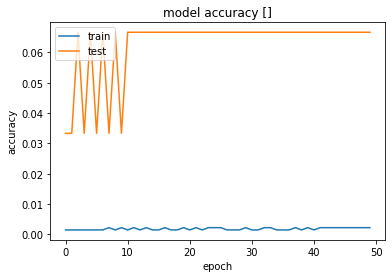

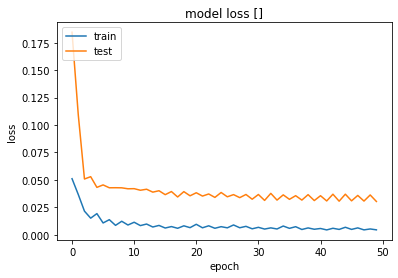

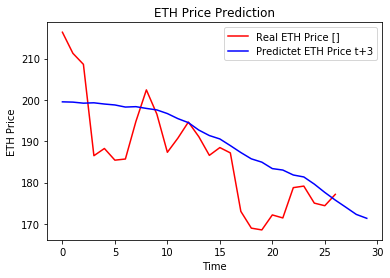

Mean Error LSTM: -4.3625317344952625
MSE LSTM: 7.628262028550664
RMSE LSTM: 9.366565749628096
MAPE LSTM: 4.128524614632839
(1460, 1, 2) (1460,) (30, 1, 2) (30,)
Train on 1460 samples, validate on 30 samples
Epoch 1/50
1460/1460 [==============================] - 4s 3ms/step - loss: 0.0481 - accuracy: 0.0021 - val_loss: 0.1901 - val_accuracy: 0.0333
Epoch 2/50
1460/1460 [==============================] - 0s 272us/step - loss: 0.0376 - accuracy: 0.0021 - val_loss: 0.1521 - val_accuracy: 0.0333
Epoch 3/50
1460/1460 [==============================] - 0s 279us/step - loss: 0.0340 - accuracy: 0.0021 - val_loss: 0.1278 - val_accuracy: 0.0333
Epoch 4/50
1460/1460 [==============================] - 0s 248us/step - loss: 0.0338 - accuracy: 0.0021 - val_loss: 0.1147 - val_accuracy: 0.0333
Epoch 5/50
1460/1460 [==============================] - 0s 242us/step - loss: 0.0318 - accuracy: 0.0021 - val_loss: 0.0980 - val_accuracy: 0.0333
Epoch 6/50
1460/1460 [==============================] - 0s 254us/

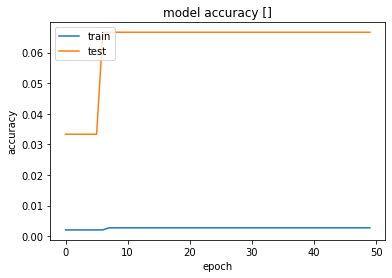

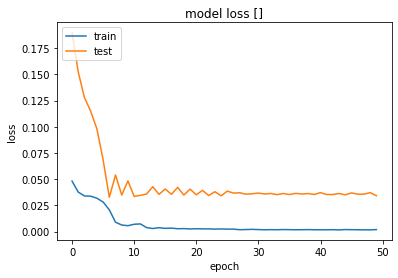

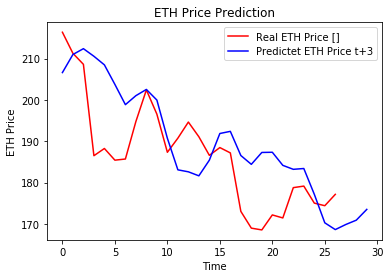

Mean Error LSTM: -4.994600000144168
MSE LSTM: 8.92597761937314
RMSE LSTM: 11.062761444407068
MAPE LSTM: 4.886715997841437
(1460, 1, 4) (1460,) (30, 1, 4) (30,)
Train on 1460 samples, validate on 30 samples
Epoch 1/50
1460/1460 [==============================] - 5s 3ms/step - loss: 0.0478 - accuracy: 0.0021 - val_loss: 0.1872 - val_accuracy: 0.0333
Epoch 2/50
1460/1460 [==============================] - 0s 250us/step - loss: 0.0367 - accuracy: 0.0021 - val_loss: 0.1450 - val_accuracy: 0.0333
Epoch 3/50
1460/1460 [==============================] - 0s 227us/step - loss: 0.0327 - accuracy: 0.0021 - val_loss: 0.1152 - val_accuracy: 0.0333
Epoch 4/50
1460/1460 [==============================] - 0s 287us/step - loss: 0.0312 - accuracy: 0.0021 - val_loss: 0.0921 - val_accuracy: 0.0333
Epoch 5/50
1460/1460 [==============================] - 0s 253us/step - loss: 0.0269 - accuracy: 0.0021 - val_loss: 0.0595 - val_accuracy: 0.0333
Epoch 6/50
1460/1460 [==============================] - 0s 252us/s

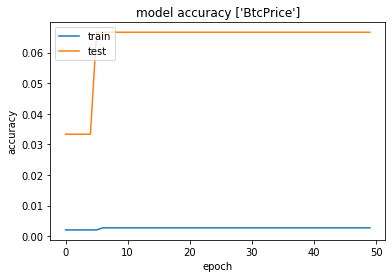

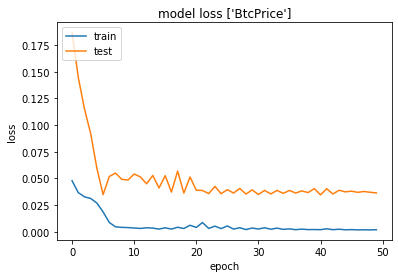

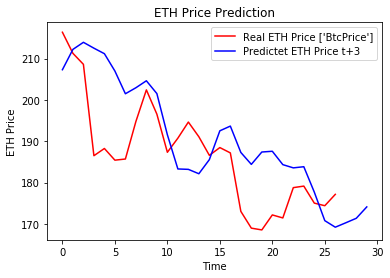

Mean Error LSTM: -6.012592238353373
MSE LSTM: 9.682964846856075
RMSE LSTM: 11.87070070258301
MAPE LSTM: 5.285901123259188
(1460, 1, 4) (1460,) (30, 1, 4) (30,)
Train on 1460 samples, validate on 30 samples
Epoch 1/50
1460/1460 [==============================] - 5s 3ms/step - loss: 0.0481 - accuracy: 0.0021 - val_loss: 0.1902 - val_accuracy: 0.0333
Epoch 2/50
1460/1460 [==============================] - 0s 230us/step - loss: 0.0370 - accuracy: 0.0021 - val_loss: 0.1512 - val_accuracy: 0.0333
Epoch 3/50
1460/1460 [==============================] - 0s 257us/step - loss: 0.0329 - accuracy: 0.0021 - val_loss: 0.1273 - val_accuracy: 0.0333
Epoch 4/50
1460/1460 [==============================] - 0s 244us/step - loss: 0.0326 - accuracy: 0.0021 - val_loss: 0.1188 - val_accuracy: 0.0333
Epoch 5/50
1460/1460 [==============================] - 0s 254us/step - loss: 0.0307 - accuracy: 0.0021 - val_loss: 0.1097 - val_accuracy: 0.0333
Epoch 6/50
1460/1460 [==============================] - 0s 229us/s

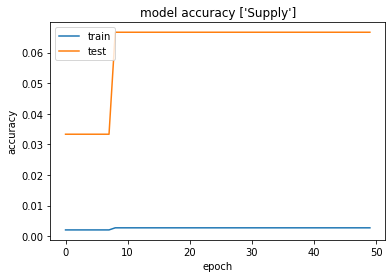

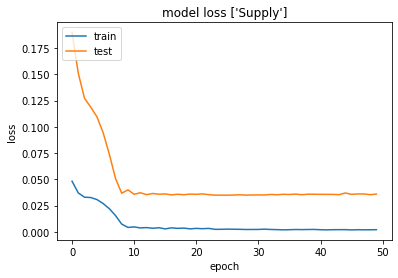

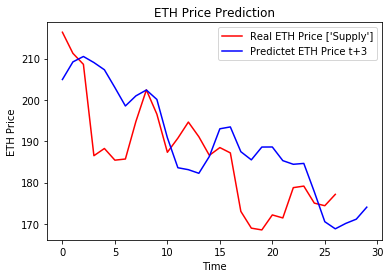

Mean Error LSTM: -5.177821129604631
MSE LSTM: 9.14623756885529
RMSE LSTM: 11.179965826568994
MAPE LSTM: 5.013599433856425
(1460, 1, 4) (1460,) (30, 1, 4) (30,)
Train on 1460 samples, validate on 30 samples
Epoch 1/50
1460/1460 [==============================] - 7s 5ms/step - loss: 0.0479 - accuracy: 0.0021 - val_loss: 0.1891 - val_accuracy: 0.0333
Epoch 2/50
1460/1460 [==============================] - 0s 321us/step - loss: 0.0371 - accuracy: 0.0021 - val_loss: 0.1496 - val_accuracy: 0.0333
Epoch 3/50
1460/1460 [==============================] - 0s 286us/step - loss: 0.0331 - accuracy: 0.0021 - val_loss: 0.1237 - val_accuracy: 0.0333
Epoch 4/50
1460/1460 [==============================] - 1s 411us/step - loss: 0.0325 - accuracy: 0.0021 - val_loss: 0.1109 - val_accuracy: 0.0333
Epoch 5/50
1460/1460 [==============================] - 0s 294us/step - loss: 0.0310 - accuracy: 0.0021 - val_loss: 0.0998 - val_accuracy: 0.0333
Epoch 6/50
1460/1460 [==============================] - 0s 309us/s

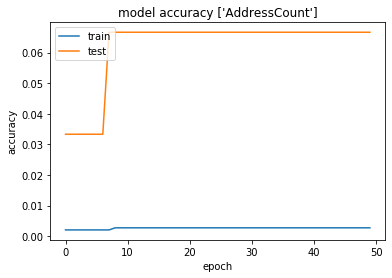

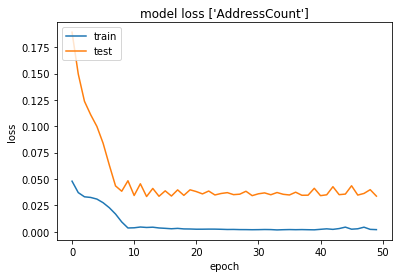

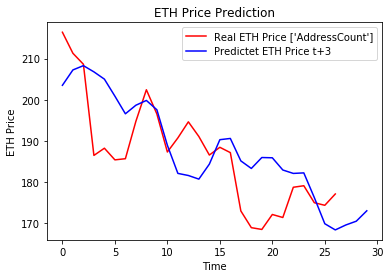

Mean Error LSTM: -3.14910103391443
MSE LSTM: 8.130064046297361
RMSE LSTM: 10.054771397752283
MAPE LSTM: 4.43559695864481
(1460, 1, 4) (1460,) (30, 1, 4) (30,)
Train on 1460 samples, validate on 30 samples
Epoch 1/50
1460/1460 [==============================] - 4s 3ms/step - loss: 0.0477 - accuracy: 0.0021 - val_loss: 0.1869 - val_accuracy: 0.0333
Epoch 2/50
1460/1460 [==============================] - 0s 202us/step - loss: 0.0365 - accuracy: 0.0021 - val_loss: 0.1450 - val_accuracy: 0.0333
Epoch 3/50
1460/1460 [==============================] - 0s 213us/step - loss: 0.0326 - accuracy: 0.0021 - val_loss: 0.1160 - val_accuracy: 0.0333
Epoch 4/50
1460/1460 [==============================] - 0s 262us/step - loss: 0.0313 - accuracy: 0.0021 - val_loss: 0.0951 - val_accuracy: 0.0333
Epoch 5/50
1460/1460 [==============================] - 0s 259us/step - loss: 0.0267 - accuracy: 0.0021 - val_loss: 0.0683 - val_accuracy: 0.0333
Epoch 6/50
1460/1460 [==============================] - 0s 256us/st

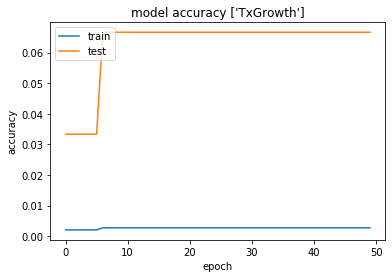

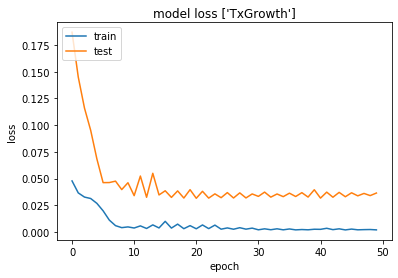

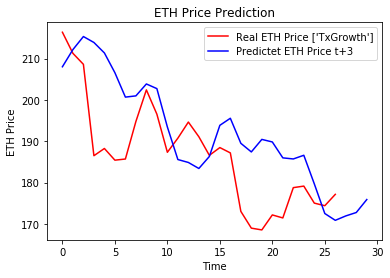

Mean Error LSTM: -7.289071087061821
MSE LSTM: 10.21187173346955
RMSE LSTM: 12.560570662729996
MAPE LSTM: 5.597863617256047
(1460, 1, 4) (1460,) (30, 1, 4) (30,)
Train on 1460 samples, validate on 30 samples
Epoch 1/50
1460/1460 [==============================] - 5s 3ms/step - loss: 0.0473 - accuracy: 0.0021 - val_loss: 0.1840 - val_accuracy: 0.0333
Epoch 2/50
1460/1460 [==============================] - 0s 323us/step - loss: 0.0362 - accuracy: 0.0021 - val_loss: 0.1435 - val_accuracy: 0.0333
Epoch 3/50
1460/1460 [==============================] - 0s 281us/step - loss: 0.0336 - accuracy: 0.0021 - val_loss: 0.1216 - val_accuracy: 0.0333
Epoch 4/50
1460/1460 [==============================] - 0s 318us/step - loss: 0.0330 - accuracy: 0.0021 - val_loss: 0.1079 - val_accuracy: 0.0333
Epoch 5/50
1460/1460 [==============================] - 1s 378us/step - loss: 0.0303 - accuracy: 0.0021 - val_loss: 0.0870 - val_accuracy: 0.0333
Epoch 6/50
1460/1460 [==============================] - 0s 312us/

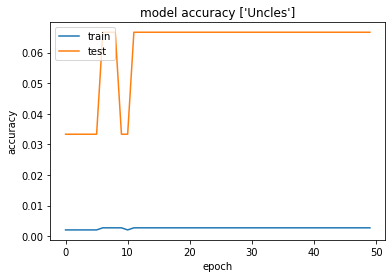

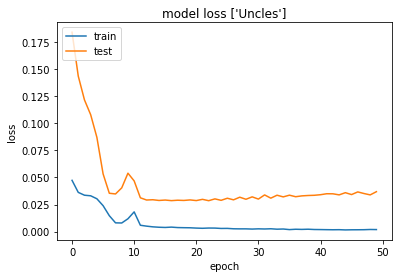

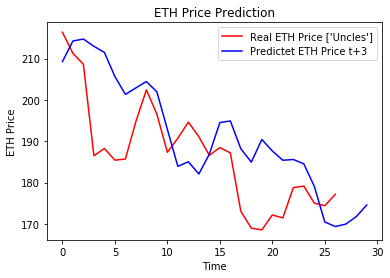

Mean Error LSTM: -6.831996073488302
MSE LSTM: 10.11288006739761
RMSE LSTM: 12.188295227096217
MAPE LSTM: 5.531571364971563
(1424, 1, 20) (1424,) (30, 1, 20) (30,)
Train on 1424 samples, validate on 30 samples
Epoch 1/50
1424/1424 [==============================] - 5s 4ms/step - loss: 0.0494 - accuracy: 0.0014 - val_loss: 0.1899 - val_accuracy: 0.0333
Epoch 2/50
1424/1424 [==============================] - 0s 290us/step - loss: 0.0378 - accuracy: 0.0014 - val_loss: 0.1398 - val_accuracy: 0.0333
Epoch 3/50
1424/1424 [==============================] - 0s 351us/step - loss: 0.0296 - accuracy: 0.0014 - val_loss: 0.0753 - val_accuracy: 0.0333
Epoch 4/50
1424/1424 [==============================] - 0s 302us/step - loss: 0.0212 - accuracy: 0.0014 - val_loss: 0.0403 - val_accuracy: 0.0667
Epoch 5/50
1424/1424 [==============================] - 0s 316us/step - loss: 0.0104 - accuracy: 0.0021 - val_loss: 0.0341 - val_accuracy: 0.0667
Epoch 6/50
1424/1424 [==============================] - 0s 312u

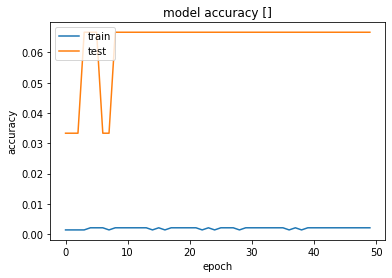

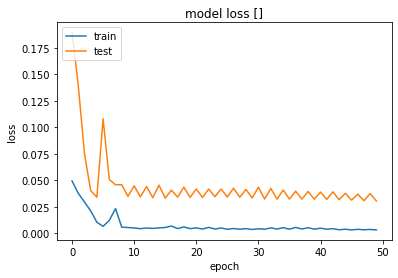

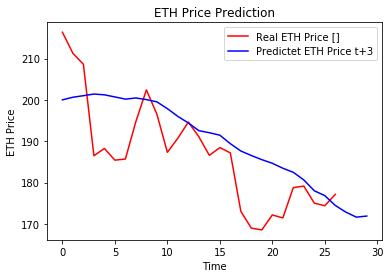

Mean Error LSTM: -5.148247945728139
MSE LSTM: 8.099980267352535
RMSE LSTM: 9.925588472145254
MAPE LSTM: 4.392932621354432
(1424, 1, 40) (1424,) (30, 1, 40) (30,)
Train on 1424 samples, validate on 30 samples
Epoch 1/50
1424/1424 [==============================] - 7s 5ms/step - loss: 0.0492 - accuracy: 0.0014 - val_loss: 0.1875 - val_accuracy: 0.0333
Epoch 2/50
1424/1424 [==============================] - 1s 357us/step - loss: 0.0353 - accuracy: 0.0014 - val_loss: 0.1214 - val_accuracy: 0.0333
Epoch 3/50
1424/1424 [==============================] - 0s 346us/step - loss: 0.0222 - accuracy: 0.0014 - val_loss: 0.0609 - val_accuracy: 0.0333
Epoch 4/50
1424/1424 [==============================] - 1s 393us/step - loss: 0.0149 - accuracy: 0.0014 - val_loss: 0.0568 - val_accuracy: 0.0333
Epoch 5/50
1424/1424 [==============================] - 1s 365us/step - loss: 0.0095 - accuracy: 0.0021 - val_loss: 0.0569 - val_accuracy: 0.0333
Epoch 6/50
1424/1424 [==============================] - 0s 324us

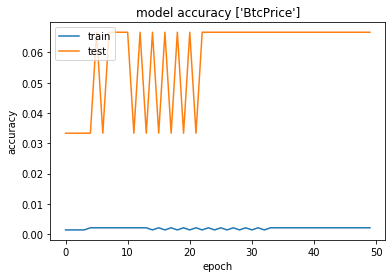

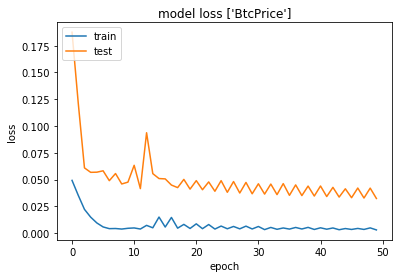

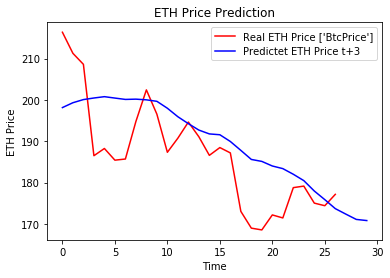

Mean Error LSTM: -4.771436172922465
MSE LSTM: 8.103892815488361
RMSE LSTM: 9.919428986472573
MAPE LSTM: 4.379584934415879
(1424, 1, 40) (1424,) (30, 1, 40) (30,)
Train on 1424 samples, validate on 30 samples
Epoch 1/50
1424/1424 [==============================] - 5s 4ms/step - loss: 0.0479 - accuracy: 0.0014 - val_loss: 0.1808 - val_accuracy: 0.0333
Epoch 2/50
1424/1424 [==============================] - 0s 227us/step - loss: 0.0312 - accuracy: 0.0014 - val_loss: 0.1214 - val_accuracy: 0.0333
Epoch 3/50
1424/1424 [==============================] - 0s 245us/step - loss: 0.0279 - accuracy: 0.0014 - val_loss: 0.1032 - val_accuracy: 0.0333
Epoch 4/50
1424/1424 [==============================] - 0s 249us/step - loss: 0.0249 - accuracy: 0.0014 - val_loss: 0.0877 - val_accuracy: 0.0333
Epoch 5/50
1424/1424 [==============================] - 0s 218us/step - loss: 0.0183 - accuracy: 0.0014 - val_loss: 0.0628 - val_accuracy: 0.0333
Epoch 6/50
1424/1424 [==============================] - 0s 228us

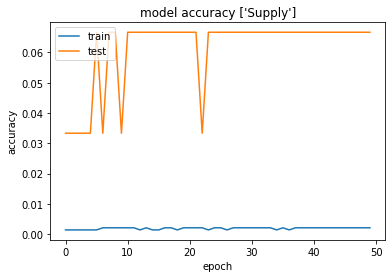

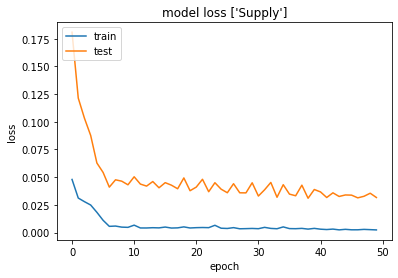

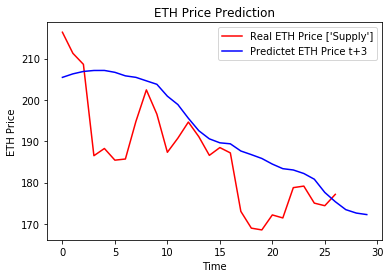

Mean Error LSTM: -7.5340324594798025
MSE LSTM: 8.970818118828323
RMSE LSTM: 11.278281730070185
MAPE LSTM: 4.8965155727705065
(1424, 1, 40) (1424,) (30, 1, 40) (30,)
Train on 1424 samples, validate on 30 samples
Epoch 1/50
1424/1424 [==============================] - 12s 9ms/step - loss: 0.0488 - accuracy: 0.0014 - val_loss: 0.1850 - val_accuracy: 0.0333
Epoch 2/50
1424/1424 [==============================] - 1s 435us/step - loss: 0.0345 - accuracy: 0.0014 - val_loss: 0.1227 - val_accuracy: 0.0333
Epoch 3/50
1424/1424 [==============================] - 1s 428us/step - loss: 0.0296 - accuracy: 0.0014 - val_loss: 0.0908 - val_accuracy: 0.0333
Epoch 4/50
1424/1424 [==============================] - 1s 451us/step - loss: 0.0269 - accuracy: 0.0014 - val_loss: 0.0869 - val_accuracy: 0.0333
Epoch 5/50
1424/1424 [==============================] - 1s 499us/step - loss: 0.0200 - accuracy: 0.0014 - val_loss: 0.0560 - val_accuracy: 0.0333
Epoch 6/50
1424/1424 [==============================] - 1s 4

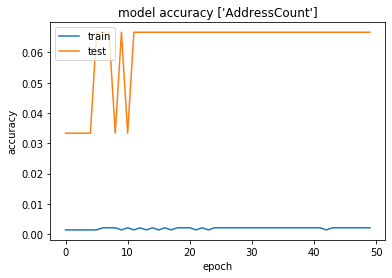

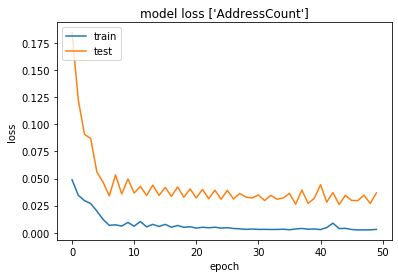

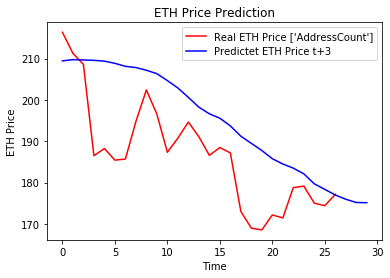

Mean Error LSTM: -10.279677935816638
MSE LSTM: 10.916889984298644
RMSE LSTM: 13.128282769314325
MAPE LSTM: 5.958777248760027
(1424, 1, 40) (1424,) (30, 1, 40) (30,)
Train on 1424 samples, validate on 30 samples
Epoch 1/50
1424/1424 [==============================] - 3s 2ms/step - loss: 0.0486 - accuracy: 0.0014 - val_loss: 0.1831 - val_accuracy: 0.0333
Epoch 2/50
1424/1424 [==============================] - 0s 122us/step - loss: 0.0337 - accuracy: 0.0014 - val_loss: 0.1148 - val_accuracy: 0.0333
Epoch 3/50
1424/1424 [==============================] - 0s 133us/step - loss: 0.0239 - accuracy: 0.0014 - val_loss: 0.0617 - val_accuracy: 0.0333
Epoch 4/50
1424/1424 [==============================] - 0s 123us/step - loss: 0.0189 - accuracy: 0.0014 - val_loss: 0.0513 - val_accuracy: 0.0333
Epoch 5/50
1424/1424 [==============================] - 0s 146us/step - loss: 0.0119 - accuracy: 0.0014 - val_loss: 0.0423 - val_accuracy: 0.0667
Epoch 6/50
1424/1424 [==============================] - 0s 22

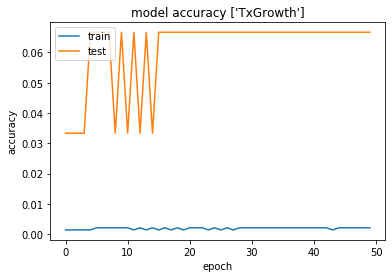

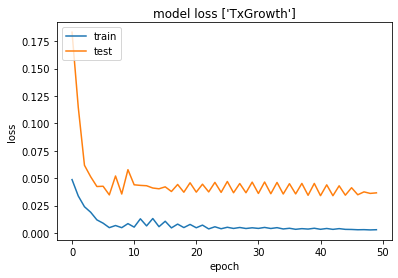

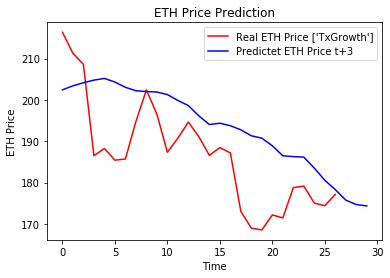

Mean Error LSTM: -8.750550957266945
MSE LSTM: 10.726583792556223
RMSE LSTM: 12.481202323527613
MAPE LSTM: 5.871864889471316
(1424, 1, 40) (1424,) (30, 1, 40) (30,)
Train on 1424 samples, validate on 30 samples
Epoch 1/50
1424/1424 [==============================] - 3s 2ms/step - loss: 0.0488 - accuracy: 0.0014 - val_loss: 0.1832 - val_accuracy: 0.0333
Epoch 2/50
1424/1424 [==============================] - 0s 134us/step - loss: 0.0345 - accuracy: 0.0014 - val_loss: 0.1149 - val_accuracy: 0.0333
Epoch 3/50
1424/1424 [==============================] - 0s 143us/step - loss: 0.0244 - accuracy: 0.0014 - val_loss: 0.0532 - val_accuracy: 0.0333
Epoch 4/50
1424/1424 [==============================] - 0s 140us/step - loss: 0.0174 - accuracy: 0.0014 - val_loss: 0.0388 - val_accuracy: 0.0667
Epoch 5/50
1424/1424 [==============================] - 0s 150us/step - loss: 0.0104 - accuracy: 0.0021 - val_loss: 0.0330 - val_accuracy: 0.0667
Epoch 6/50
1424/1424 [==============================] - 0s 142

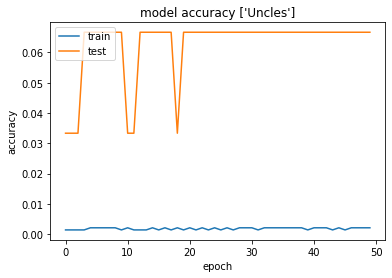

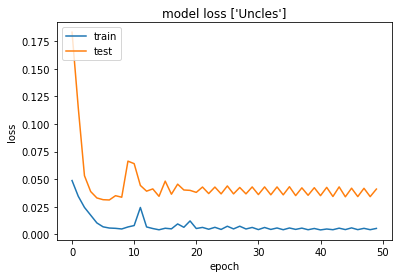

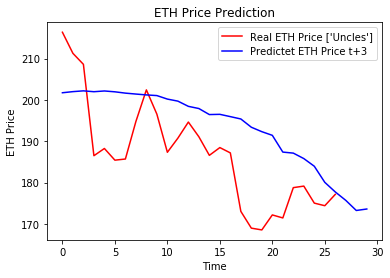

Mean Error LSTM: -8.768440931329032
MSE LSTM: 11.106661379381467
RMSE LSTM: 12.815043050239092
MAPE LSTM: 6.082758983301803
(1364, 1, 50) (1364,) (30, 1, 50) (30,)
Train on 1364 samples, validate on 30 samples
Epoch 1/50
1364/1364 [==============================] - 3s 2ms/step - loss: 0.0504 - accuracy: 0.0015 - val_loss: 0.1834 - val_accuracy: 0.0333
Epoch 2/50
1364/1364 [==============================] - 0s 121us/step - loss: 0.0358 - accuracy: 0.0015 - val_loss: 0.1077 - val_accuracy: 0.0333
Epoch 3/50
1364/1364 [==============================] - 0s 122us/step - loss: 0.0211 - accuracy: 0.0015 - val_loss: 0.0409 - val_accuracy: 0.0667
Epoch 4/50
1364/1364 [==============================] - 0s 133us/step - loss: 0.0140 - accuracy: 0.0022 - val_loss: 0.0453 - val_accuracy: 0.0333
Epoch 5/50
1364/1364 [==============================] - 0s 118us/step - loss: 0.0174 - accuracy: 0.0015 - val_loss: 0.0355 - val_accuracy: 0.0667
Epoch 6/50
1364/1364 [==============================] - 0s 115

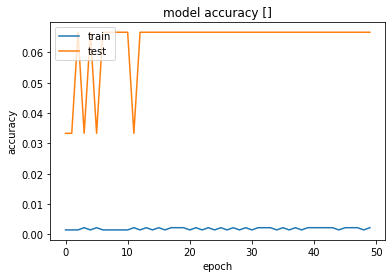

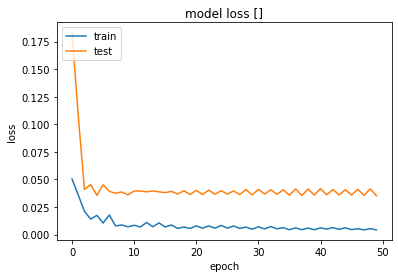

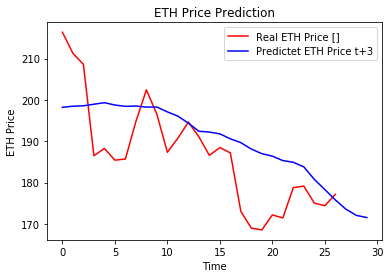

Mean Error LSTM: -5.18704606389559
MSE LSTM: 8.653052589429755
RMSE LSTM: 10.399505753691857
MAPE LSTM: 4.698714832418148
(1364, 1, 100) (1364,) (30, 1, 100) (30,)
Train on 1364 samples, validate on 30 samples
Epoch 1/50
1364/1364 [==============================] - 3s 2ms/step - loss: 0.0505 - accuracy: 0.0015 - val_loss: 0.1830 - val_accuracy: 0.0333
Epoch 2/50
1364/1364 [==============================] - 0s 123us/step - loss: 0.0327 - accuracy: 0.0015 - val_loss: 0.0902 - val_accuracy: 0.0333
Epoch 3/50
1364/1364 [==============================] - 0s 137us/step - loss: 0.0175 - accuracy: 0.0015 - val_loss: 0.0514 - val_accuracy: 0.0333
Epoch 4/50
1364/1364 [==============================] - 0s 141us/step - loss: 0.0147 - accuracy: 0.0015 - val_loss: 0.0443 - val_accuracy: 0.0667
Epoch 5/50
1364/1364 [==============================] - 0s 137us/step - loss: 0.0078 - accuracy: 0.0022 - val_loss: 0.0430 - val_accuracy: 0.0333
Epoch 6/50
1364/1364 [==============================] - 0s 131

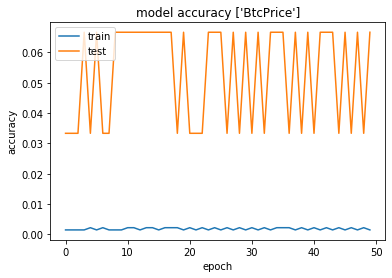

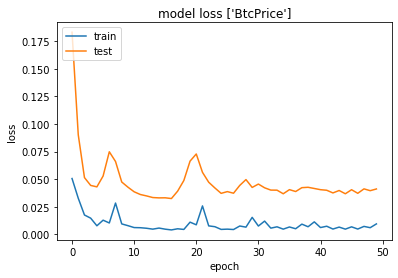

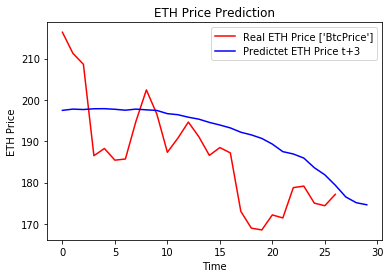

Mean Error LSTM: -6.338792394719757
MSE LSTM: 9.909062811632964
RMSE LSTM: 11.61652870910045
MAPE LSTM: 5.404588370992997
(1364, 1, 100) (1364,) (30, 1, 100) (30,)
Train on 1364 samples, validate on 30 samples
Epoch 1/50
1364/1364 [==============================] - 3s 2ms/step - loss: 0.0500 - accuracy: 0.0015 - val_loss: 0.1824 - val_accuracy: 0.0333
Epoch 2/50
1364/1364 [==============================] - 0s 149us/step - loss: 0.0323 - accuracy: 0.0015 - val_loss: 0.1146 - val_accuracy: 0.0333
Epoch 3/50
1364/1364 [==============================] - 0s 155us/step - loss: 0.0290 - accuracy: 0.0015 - val_loss: 0.0941 - val_accuracy: 0.0333
Epoch 4/50
1364/1364 [==============================] - 0s 144us/step - loss: 0.0233 - accuracy: 0.0015 - val_loss: 0.0665 - val_accuracy: 0.0333
Epoch 5/50
1364/1364 [==============================] - 0s 148us/step - loss: 0.0123 - accuracy: 0.0015 - val_loss: 0.0449 - val_accuracy: 0.0667
Epoch 6/50
1364/1364 [==============================] - 0s 152

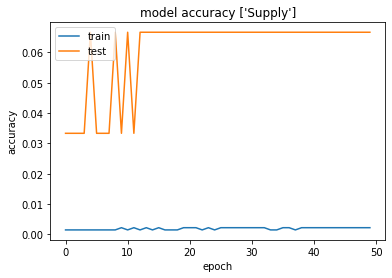

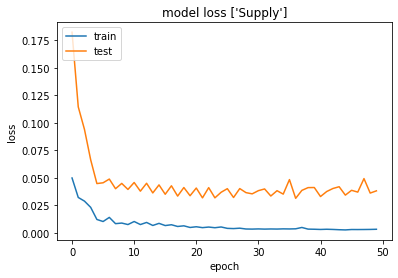

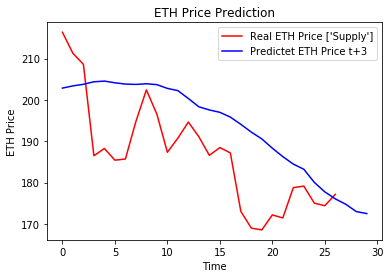

Mean Error LSTM: -9.076463828020637
MSE LSTM: 11.1012270259195
RMSE LSTM: 12.81563192238397
MAPE LSTM: 6.053829084331805
(1364, 1, 100) (1364,) (30, 1, 100) (30,)
Train on 1364 samples, validate on 30 samples
Epoch 1/50
1364/1364 [==============================] - 3s 2ms/step - loss: 0.0502 - accuracy: 0.0015 - val_loss: 0.1815 - val_accuracy: 0.0333
Epoch 2/50
1364/1364 [==============================] - 0s 150us/step - loss: 0.0341 - accuracy: 0.0015 - val_loss: 0.1062 - val_accuracy: 0.0333
Epoch 3/50
1364/1364 [==============================] - 1s 464us/step - loss: 0.0280 - accuracy: 0.0015 - val_loss: 0.0748 - val_accuracy: 0.0333
Epoch 4/50
1364/1364 [==============================] - 1s 378us/step - loss: 0.0234 - accuracy: 0.0015 - val_loss: 0.0573 - val_accuracy: 0.0333
Epoch 5/50
1364/1364 [==============================] - 0s 197us/step - loss: 0.0126 - accuracy: 0.0015 - val_loss: 0.0335 - val_accuracy: 0.0667
Epoch 6/50
1364/1364 [==============================] - 0s 227u

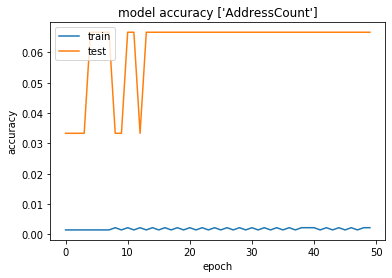

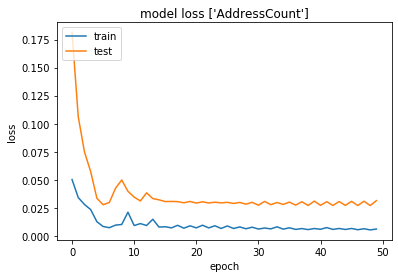

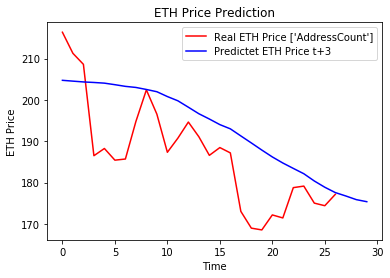

Mean Error LSTM: -7.999698344601537
MSE LSTM: 9.676436226456266
RMSE LSTM: 11.454861275717162
MAPE LSTM: 5.285919361477175
(1364, 1, 100) (1364,) (30, 1, 100) (30,)
Train on 1364 samples, validate on 30 samples
Epoch 1/50
1364/1364 [==============================] - 4s 3ms/step - loss: 0.0503 - accuracy: 0.0015 - val_loss: 0.1806 - val_accuracy: 0.0333
Epoch 2/50
1364/1364 [==============================] - 0s 165us/step - loss: 0.0309 - accuracy: 0.0015 - val_loss: 0.0811 - val_accuracy: 0.0333
Epoch 3/50
1364/1364 [==============================] - 0s 136us/step - loss: 0.0206 - accuracy: 0.0015 - val_loss: 0.0556 - val_accuracy: 0.0333
Epoch 4/50
1364/1364 [==============================] - 0s 160us/step - loss: 0.0208 - accuracy: 0.0015 - val_loss: 0.0521 - val_accuracy: 0.0333
Epoch 5/50
1364/1364 [==============================] - 0s 161us/step - loss: 0.0122 - accuracy: 0.0015 - val_loss: 0.0407 - val_accuracy: 0.0667
Epoch 6/50
1364/1364 [==============================] - 0s 13

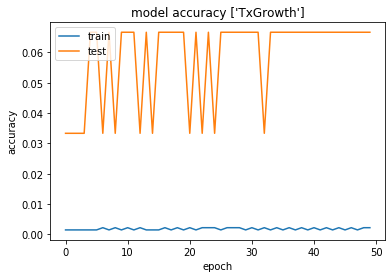

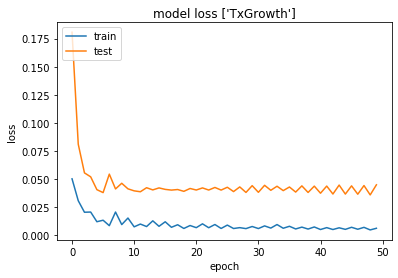

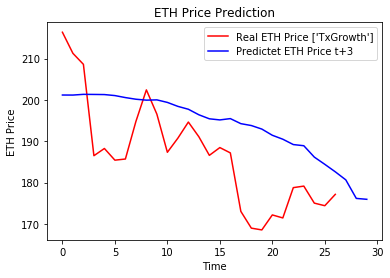

Mean Error LSTM: -8.887847759569143
MSE LSTM: 11.484886940342415
RMSE LSTM: 13.030914736339703
MAPE LSTM: 6.306936821398322
(1364, 1, 100) (1364,) (30, 1, 100) (30,)
Train on 1364 samples, validate on 30 samples
Epoch 1/50
1364/1364 [==============================] - 2s 2ms/step - loss: 0.0498 - accuracy: 0.0015 - val_loss: 0.1761 - val_accuracy: 0.0333
Epoch 2/50
1364/1364 [==============================] - 0s 123us/step - loss: 0.0323 - accuracy: 0.0015 - val_loss: 0.0838 - val_accuracy: 0.0333
Epoch 3/50
1364/1364 [==============================] - 0s 132us/step - loss: 0.0206 - accuracy: 0.0015 - val_loss: 0.0452 - val_accuracy: 0.0667
Epoch 4/50
1364/1364 [==============================] - 0s 121us/step - loss: 0.0145 - accuracy: 0.0015 - val_loss: 0.0346 - val_accuracy: 0.0667
Epoch 5/50
1364/1364 [==============================] - 0s 119us/step - loss: 0.0097 - accuracy: 0.0015 - val_loss: 0.0310 - val_accuracy: 0.0667
Epoch 6/50
1364/1364 [==============================] - 0s 1

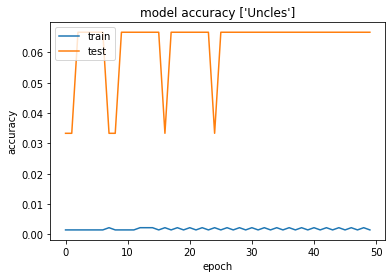

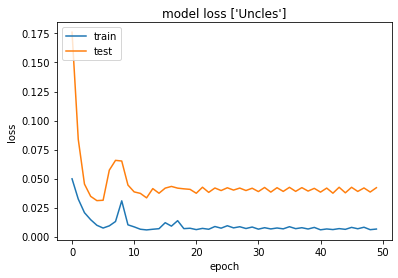

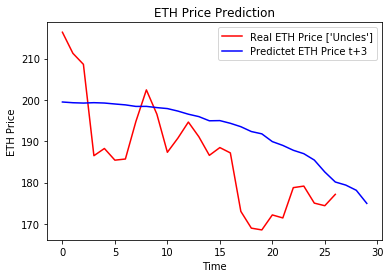

Mean Error LSTM: -7.427576152781656
MSE LSTM: 10.5555523936285
RMSE LSTM: 12.16934722009573
MAPE LSTM: 5.777574507102174
(1264, 1, 100) (1264,) (30, 1, 100) (30,)
Train on 1264 samples, validate on 30 samples
Epoch 1/50
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0553 - accuracy: 7.9114e-04 - val_loss: 0.1910 - val_accuracy: 0.0333
Epoch 2/50
1264/1264 [==============================] - 0s 138us/step - loss: 0.0390 - accuracy: 7.9114e-04 - val_loss: 0.1192 - val_accuracy: 0.0333
Epoch 3/50
1264/1264 [==============================] - 0s 104us/step - loss: 0.0209 - accuracy: 7.9114e-04 - val_loss: 0.0780 - val_accuracy: 0.0333
Epoch 4/50
1264/1264 [==============================] - 0s 107us/step - loss: 0.0167 - accuracy: 7.9114e-04 - val_loss: 0.0679 - val_accuracy: 0.0333
Epoch 5/50
1264/1264 [==============================] - 0s 104us/step - loss: 0.0191 - accuracy: 7.9114e-04 - val_loss: 0.0631 - val_accuracy: 0.0333
Epoch 6/50
1264/1264 [=====================

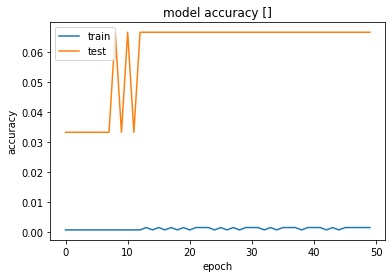

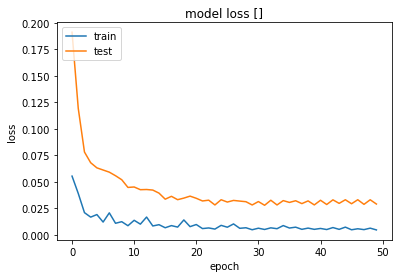

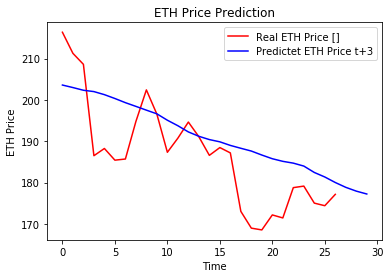

Mean Error LSTM: -5.61446843594314
MSE LSTM: 8.180867779133505
RMSE LSTM: 9.96042161807793
MAPE LSTM: 4.482577599679873
(1264, 1, 200) (1264,) (30, 1, 200) (30,)
Train on 1264 samples, validate on 30 samples
Epoch 1/50
1264/1264 [==============================] - 5s 4ms/step - loss: 0.0547 - accuracy: 7.9114e-04 - val_loss: 0.1882 - val_accuracy: 0.0333
Epoch 2/50
1264/1264 [==============================] - 0s 176us/step - loss: 0.0353 - accuracy: 7.9114e-04 - val_loss: 0.1012 - val_accuracy: 0.0333
Epoch 3/50
1264/1264 [==============================] - 0s 164us/step - loss: 0.0203 - accuracy: 7.9114e-04 - val_loss: 0.0785 - val_accuracy: 0.0333
Epoch 4/50
1264/1264 [==============================] - 0s 204us/step - loss: 0.0208 - accuracy: 7.9114e-04 - val_loss: 0.0761 - val_accuracy: 0.0333
Epoch 5/50
1264/1264 [==============================] - 0s 160us/step - loss: 0.0144 - accuracy: 7.9114e-04 - val_loss: 0.0684 - val_accuracy: 0.0333
Epoch 6/50
1264/1264 [======================

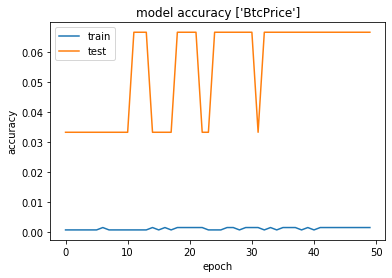

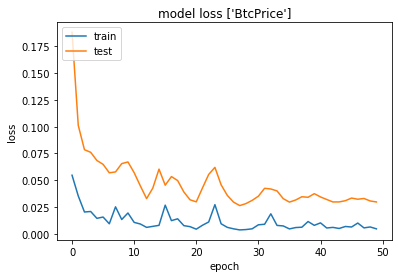

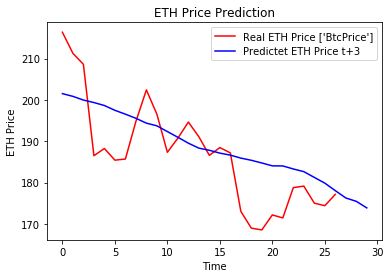

Mean Error LSTM: -3.3158634659979205
MSE LSTM: 7.3572573461356034
RMSE LSTM: 8.983888344172723
MAPE LSTM: 3.9928276683140007
(1264, 1, 200) (1264,) (30, 1, 200) (30,)
Train on 1264 samples, validate on 30 samples
Epoch 1/50
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0547 - accuracy: 7.9114e-04 - val_loss: 0.1896 - val_accuracy: 0.0333
Epoch 2/50
1264/1264 [==============================] - 0s 127us/step - loss: 0.0349 - accuracy: 7.9114e-04 - val_loss: 0.1212 - val_accuracy: 0.0333
Epoch 3/50
1264/1264 [==============================] - 0s 128us/step - loss: 0.0300 - accuracy: 7.9114e-04 - val_loss: 0.1038 - val_accuracy: 0.0333
Epoch 4/50
1264/1264 [==============================] - 0s 136us/step - loss: 0.0239 - accuracy: 7.9114e-04 - val_loss: 0.0872 - val_accuracy: 0.0333
Epoch 5/50
1264/1264 [==============================] - 0s 126us/step - loss: 0.0158 - accuracy: 7.9114e-04 - val_loss: 0.0791 - val_accuracy: 0.0333
Epoch 6/50
1264/1264 [=================

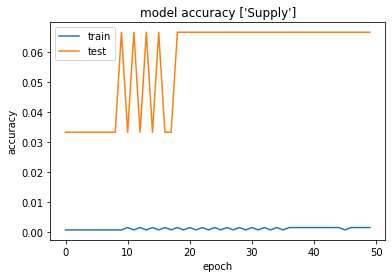

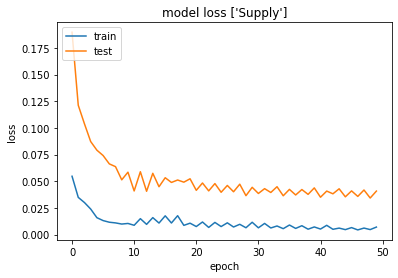

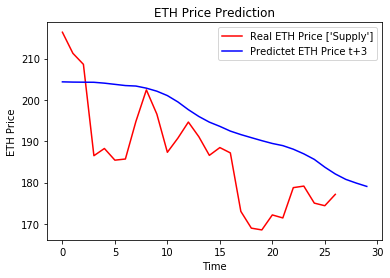

Mean Error LSTM: -9.215621026268723
MSE LSTM: 10.941623580809004
RMSE LSTM: 12.508882000723776
MAPE LSTM: 6.009697570534626
(1264, 1, 200) (1264,) (30, 1, 200) (30,)
Train on 1264 samples, validate on 30 samples
Epoch 1/50
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0548 - accuracy: 7.9114e-04 - val_loss: 0.1886 - val_accuracy: 0.0333
Epoch 2/50
1264/1264 [==============================] - 0s 143us/step - loss: 0.0367 - accuracy: 7.9114e-04 - val_loss: 0.1119 - val_accuracy: 0.0333
Epoch 3/50
1264/1264 [==============================] - 0s 144us/step - loss: 0.0286 - accuracy: 7.9114e-04 - val_loss: 0.0893 - val_accuracy: 0.0333
Epoch 4/50
1264/1264 [==============================] - 0s 149us/step - loss: 0.0248 - accuracy: 7.9114e-04 - val_loss: 0.0798 - val_accuracy: 0.0333
Epoch 5/50
1264/1264 [==============================] - 0s 140us/step - loss: 0.0177 - accuracy: 7.9114e-04 - val_loss: 0.0606 - val_accuracy: 0.0333
Epoch 6/50
1264/1264 [==================

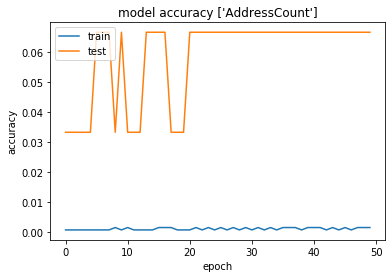

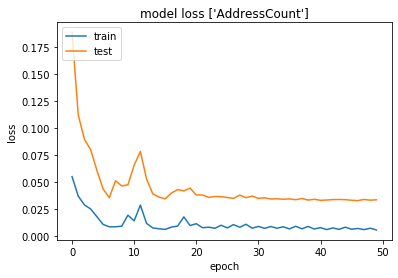

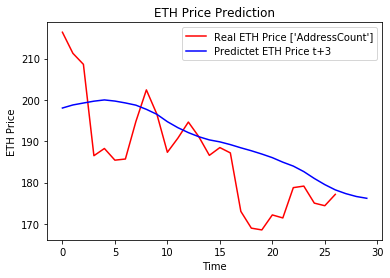

Mean Error LSTM: -4.710001634116535
MSE LSTM: 8.229938831263125
RMSE LSTM: 10.20446833069606
MAPE LSTM: 4.470595890165553
(1264, 1, 200) (1264,) (30, 1, 200) (30,)
Train on 1264 samples, validate on 30 samples
Epoch 1/50
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0550 - accuracy: 7.9114e-04 - val_loss: 0.1883 - val_accuracy: 0.0333
Epoch 2/50
1264/1264 [==============================] - 0s 149us/step - loss: 0.0347 - accuracy: 7.9114e-04 - val_loss: 0.0944 - val_accuracy: 0.0333
Epoch 3/50
1264/1264 [==============================] - 0s 135us/step - loss: 0.0239 - accuracy: 7.9114e-04 - val_loss: 0.0738 - val_accuracy: 0.0333
Epoch 4/50
1264/1264 [==============================] - 0s 160us/step - loss: 0.0241 - accuracy: 7.9114e-04 - val_loss: 0.0786 - val_accuracy: 0.0333
Epoch 5/50
1264/1264 [==============================] - 0s 145us/step - loss: 0.0179 - accuracy: 7.9114e-04 - val_loss: 0.0667 - val_accuracy: 0.0333
Epoch 6/50
1264/1264 [====================

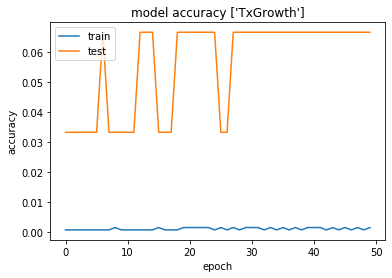

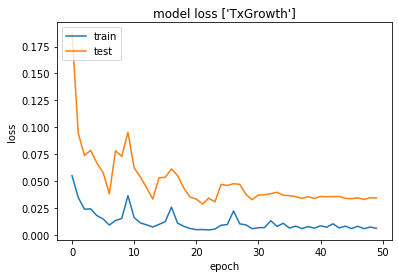

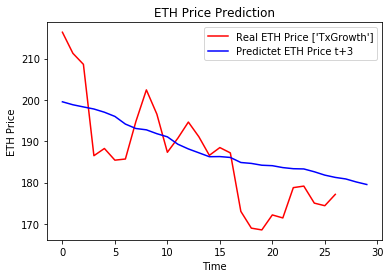

Mean Error LSTM: -2.476017820912392
MSE LSTM: 7.748589442118455
RMSE LSTM: 9.072433259260887
MAPE LSTM: 4.184748873175267
(1264, 1, 200) (1264,) (30, 1, 200) (30,)
Train on 1264 samples, validate on 30 samples
Epoch 1/50
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0546 - accuracy: 7.9114e-04 - val_loss: 0.1797 - val_accuracy: 0.0333
Epoch 2/50
1264/1264 [==============================] - 0s 129us/step - loss: 0.0333 - accuracy: 7.9114e-04 - val_loss: 0.0874 - val_accuracy: 0.0333
Epoch 3/50
1264/1264 [==============================] - 0s 138us/step - loss: 0.0236 - accuracy: 7.9114e-04 - val_loss: 0.0704 - val_accuracy: 0.0333
Epoch 4/50
1264/1264 [==============================] - 0s 137us/step - loss: 0.0187 - accuracy: 7.9114e-04 - val_loss: 0.0672 - val_accuracy: 0.0333
Epoch 5/50
1264/1264 [==============================] - 0s 122us/step - loss: 0.0099 - accuracy: 7.9114e-04 - val_loss: 0.0570 - val_accuracy: 0.0333
Epoch 6/50
1264/1264 [====================

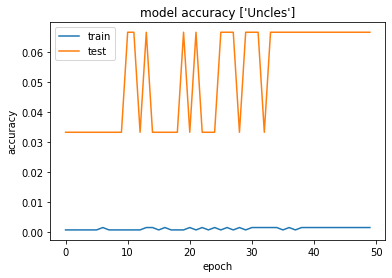

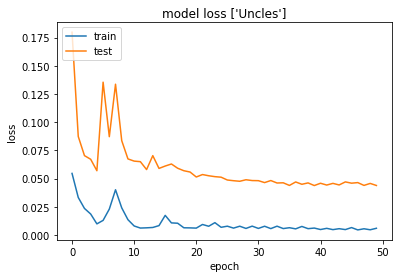

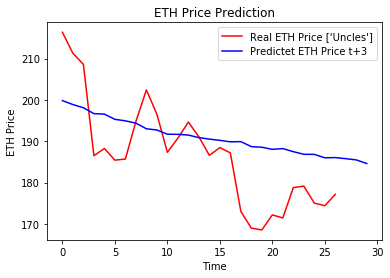

Mean Error LSTM: -4.92219349048757
MSE LSTM: 9.105626708048366
RMSE LSTM: 10.806370926943474
MAPE LSTM: 4.98280205566389


In [11]:

def LSTM_Evaluation(data, sequence = 60,pred_time = 3,horizon = 30,features = [],layer = 50,epo = 50,batch=67,
                    optimizer_lstm ="adam",loss_lstm = 'mean_squared_error',info=np.nan):

    actual, prediction = lstm(data.copy(),sequence,pred_time,horizon,features,layer,epo,batch,optimizer_lstm,loss_lstm)
    
    if pred_time == 1:
        data = evaluation(pd.DataFrame(actual)[:-pred_time],prediction[:-pred_time],"LSTM",info)
    else:
        data = evaluation(pd.DataFrame(actual)[:-pred_time],prediction[:-pred_time],"LSTM",info)

    return data

columns = ["BtcPrice","Supply","AddressCount","TxGrowth","Uncles"]
timeToInclude = [2,20,50,100]


ev = pd.DataFrame()


ev = ev.append(LSTM_Evaluation(df_data.copy()), ignore_index = True)
for j in timeToInclude:
    ev = ev.append(LSTM_Evaluation(df_data.copy(),sequence = j,info= "Sequence: "+str(j)), ignore_index = True)
    for i in columns:
        ev = ev.append(LSTM_Evaluation(df_data.copy(),features = [i],sequence = j, info= "Sequence: "+str(j) + "Feature: "+str(columns)), ignore_index = True)


In [19]:
ev.sort_values(by=['MAPE'], ascending=True)

,Model,Error,MAE,RMS,MAPE,Info
20,LSTM,-3.315863,7.357257,8.983888,3.992828,"Sequence: 100Feature: ['BtcPrice', 'Supply', '..."
0,LSTM,-4.362532,7.628262,9.366566,4.128525,NaN
23,LSTM,-2.476018,7.748589,9.072433,4.184749,"Sequence: 100Feature: ['BtcPrice', 'Supply', '..."
8,LSTM,-4.771436,8.103893,9.919429,4.379585,"Sequence: 20Feature: ['BtcPrice', 'Supply', 'A..."
7,LSTM,-5.148248,8.099980,9.925588,4.392933,Sequence: 20
4,LSTM,-3.149101,8.130064,10.054771,4.435597,"Sequence: 2Feature: ['BtcPrice', 'Supply', 'Ad..."
22,LSTM,-4.710002,8.229939,10.204468,4.470596,"Sequence: 100Feature: ['BtcPrice', 'Supply', '..."
19,LSTM,-5.614468,8.180868,9.960422,4.482578,Sequence: 100
13,LSTM,-5.187046,8.653053,10.399506,4.698715,Sequence: 50
1,LSTM,-4.994600,8.925978,11.062761,4.886716,Sequence: 2


In [20]:
ev

,Model,Error,MAE,RMS,MAPE,Info
0,LSTM,-4.362532,7.628262,9.366566,4.128525,NaN
1,LSTM,-4.994600,8.925978,11.062761,4.886716,Sequence: 2
2,LSTM,-6.012592,9.682965,11.870701,5.285901,"Sequence: 2Feature: ['BtcPrice', 'Supply', 'Ad..."
3,LSTM,-5.177821,9.146238,11.179966,5.013599,"Sequence: 2Feature: ['BtcPrice', 'Supply', 'Ad..."
4,LSTM,-3.149101,8.130064,10.054771,4.435597,"Sequence: 2Feature: ['BtcPrice', 'Supply', 'Ad..."
5,LSTM,-7.289071,10.211872,12.560571,5.597864,"Sequence: 2Feature: ['BtcPrice', 'Supply', 'Ad..."
6,LSTM,-6.831996,10.112880,12.188295,5.531571,"Sequence: 2Feature: ['BtcPrice', 'Supply', 'Ad..."
7,LSTM,-5.148248,8.099980,9.925588,4.392933,Sequence: 20
8,LSTM,-4.771436,8.103893,9.919429,4.379585,"Sequence: 20Feature: ['BtcPrice', 'Supply', 'A..."
9,LSTM,-7.534032,8.970818,11.278282,4.896516,"Sequence: 20Feature: ['BtcPrice', 'Supply', 'A..."


In [21]:
columns

['BtcPrice', 'Supply', 'AddressCount', 'TxGrowth', 'Uncles']

## 5) Evaluation
### Some evaluation methods

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# from https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn/294069#294069
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluation(test,pred,model,info=np.nan):
    # Forcast Error
    # e = y - ^y (to given time)
    error = test-pred
    error = error.mean()[0]
    print("Mean Error "+model+": " +str(error))
    
    # Scale dependen Errors
    # Mean absolute Error (i think it is the above one...) MAE = mean(|error|)
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(test, pred)
    print("MSE "+model+": "  + str(mae))
    
    # Root mean square error RMSE= sqrt(mean(e^2 of t)) no clue how to calclulate that

    rms = sqrt(mean_squared_error(test, pred))
    print("RMSE "+model+": " + str(rms))
    
    
    # Percentage errors
    # from https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn/294069#294069
    
    mape = mean_absolute_percentage_error(test,pred)
    print("MAPE "+model+": " +str(mape))
    d = {'Model': [model], 'Error': [error], "MAE": [mae], "RMS": [rms], "MAPE": [mape],"Info":[info]}
    
    
    return pd.DataFrame(data = d)
    
    
    # Need to find a way to calculate the MASE
    # Scaled errors
    # MASE copied from : https://github.com/CamDavidsonPilon/Python-Numerics/blob/master/TimeSeries/MASE.py
    
    
    # The Idea that i have is that we run our mordels for different time horizons (day, week, month, year)
    # and check hof the metricis for the evaluation change
    # for every model regarding the time horizone we give back a data frame and append them with the other 
    # models to see wiche one is performing the most reliable

In [ ]:
evaluation(test_set,pred,"LSTM")

### Evaluation plots and data comparison

### Conclusion

In [ ]:
df_data.head()

In [ ]:
df_data.columns

In [ ]:
from sklearn import preprocessing

sequenz = 60
pred_horizon = 3
sc = MinMaxScaler(feature_range=(0,1))

def pros(df,sc):
    for col in df.columns
    
    return df

yasin = df_data[["Price","AddressCount"]].copy()
yasin[f"future-{pred_horizon}"] = yasin["Price"].shift(-pred_horizon)
yasin.head(10)

last_5pct = -int(0.05*len(yasin))

yasin_training = yasin[:-last_5pct]
yasin_test = yasin[-last_5pct:]

In [ ]:
a = pros(yasin_test.copy(),sc)
print(a)

In [ ]:
df_data[-30-useData:]